In [1]:
HIV model smiller&kgold

SyntaxError: invalid syntax (<ipython-input-1-872420fc9e6b>, line 1)

In [84]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [125]:
R = 200.0
L = 0.0
V = .0000004
E = 0.0
stocks = State(R = R,
                L = L,
                V = V,
                E = E)

,values
R,2.000000e+02
L,0.000000e+00
V,4.000000e-07
E,0.000000e+00


In [149]:
flows = System(g = 1.36,
                u = .00136,
                T = .2, 
                B = .00027,
                p = .1,
                a = .036,
                s = 2,
                d = .33,
                pi = 100,
                t_0 = 0,
                t_end = 120,
                dt = .01)
    
#flows = System(Rin = g*t,
              #  R2E = (1-p)*B*R*V,
               # R2L = p*B*R*V,
                #Rout = u*R,
                #L2E = a*L,
                #Lout = u*L,
                #Eout = d*E,
                #Vin = pi*E,
                #Vout = s*V,
                #t_0 = t_0,
                #t_end = t_end
                

,values
g,1.36000
u,0.00136
T,0.20000
B,0.00027
p,0.10000
a,0.03600
s,2.00000
d,0.33000
pi,100.00000
t_0,0.00000


In [150]:
def update_func(state, t, system):
    
    unpack(system)
    
    r = state.R
    l = state.L
    e = state.E
    v = state.V
    
    for t in range(int(1/dt)):
        deltaR = ((g*T) - u*r - (B*r*v))*dt #(system.Rin - system.Rout - (system.R2L + system.R2E))*dt
        deltaL = ((p*B*r*v) - (u*l) - (a*l))*dt #(system.R2L - system.Lout -system.L2E)*dt
        deltaE = (((1-p)*B*r*v) + a*l - d*e)*dt #(system.R2E + system.L2E - system.Eout)*dt
        deltaV = (pi*e -s*v)*dt #(system.Vin - system.Vout)*dt

        r += deltaR
        l += deltaL
        e += deltaE
        v += deltaV
    
    #print(deltaR)
    return State(R=r,L=l,E=e,V=v)
    #print(R,L,E,V)

In [151]:
###def run_func(update_func, state, system):
    
   # for t in linrange(t_0, t_end):
    #    state[t+1] = update_func(state[t], t, system)
    #return state
    #print(state)

In [152]:
def run_simulation(system, update_func):
    
    unpack(system)
    
    frame = TimeFrame(columns=stocks.index)
    frame.row[t_0] = stocks
    
    for t in linrange(t_0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [153]:
def plot_results(R, L, E):

    plot(R, '--', label='white blood cells')
    plot(L, '-', label='Infected')
    plot(E, ':', label='Infectious')
    decorate(xlabel='Time',
             ylabel='things')

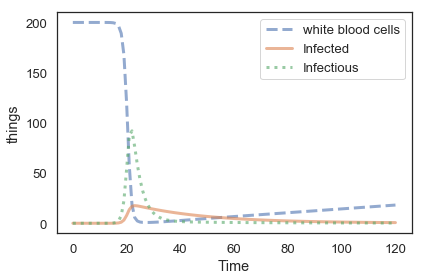

In [154]:
run_simulation(flows, update_func)
results = run_simulation(flows, update_func)
plot_results(results.R, results.L, results.E)

In [139]:
def plot_resultsV(v):
    plot(v, '-', label = 'virions')

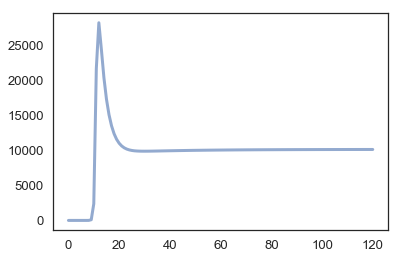

In [141]:
plot_resultsV(results.V)